In [ ]:
# ! pip install --upgrade huggingface_hub datasets
! pip install datasets==3.6.0
! pip install dotenv

In [3]:
# import datasets

In [4]:
import os
import dotenv

In [5]:
import numpy as np

In [ ]:
from datasets import load_dataset

In [7]:
# import os
from huggingface_hub import login

# Option 1: store token as an environment variable
dotenv.load_dotenv()

# Option 2: then use it
login(token=os.getenv('HUGGINGFACe'))

In [8]:
yoruba_dat = load_dataset("mozilla-foundation/common_voice_17_0","yo",split = "train", token = True)

In [9]:
yoruba_upvotes = np.array(yoruba_dat["up_votes"])
yoruba_downvotes = np.array(yoruba_dat["down_votes"])

In [10]:
import matplotlib.pyplot as plt

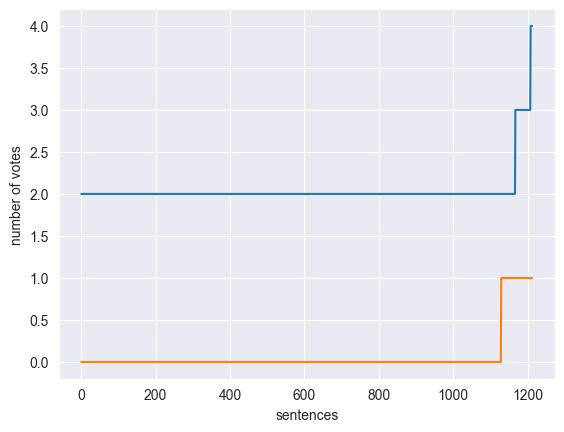

In [11]:
plt.plot(sorted(yoruba_upvotes))
plt.plot(sorted(yoruba_downvotes))
plt.ylabel('number of votes')
plt.xlabel('sentences')
plt.show()

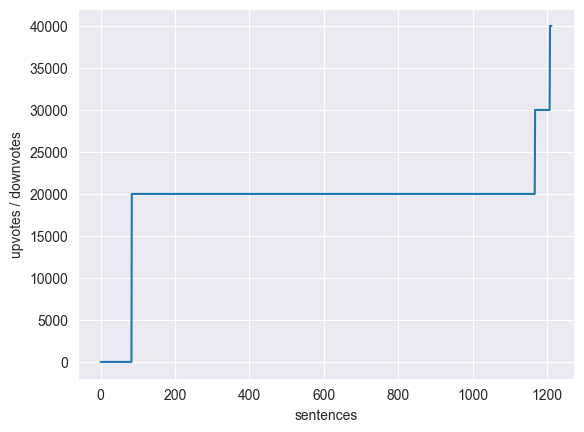

In [12]:
plt.plot(sorted(yoruba_upvotes / (yoruba_downvotes + 0.0001)))
plt.ylabel('upvotes / downvotes')
plt.xlabel('sentences')
plt.show()

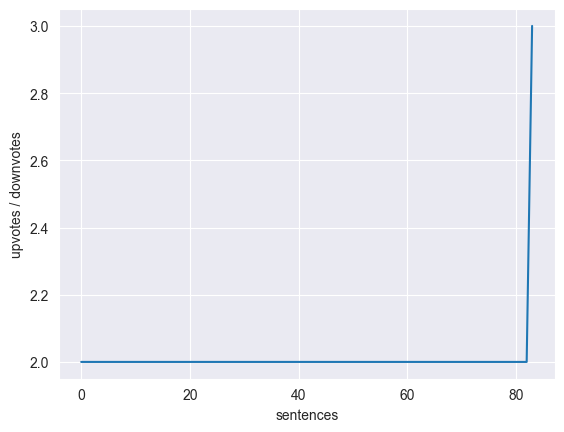

In [13]:
plt.plot(sorted(yoruba_upvotes[yoruba_downvotes!=0] / (yoruba_downvotes[yoruba_downvotes!=0])))
plt.ylabel('upvotes / downvotes')
plt.xlabel('sentences')
plt.show()

In [ ]:
! pip install epitran

In [16]:
import epitran

In [17]:
epi = epitran.Epitran('yor-Latn')
text = 'Ẹ kú àárọ̀'
ipa = epi.transliterate(text)

print(ipa)

ɛ kú àárɔ̀


In [18]:
sentences_test = np.array(yoruba_dat["sentence"])

In [19]:
for i in sentences_test[0:10]:
  print(i)
  print(epi.transliterate(i))

Ọmọ ẹgbẹ́ òkùnkùn dèrò àtìmọ́lé torí nílùú Ìbàdàn.
ɔmɔ ɛɡ͡bɛ́ òkùnkùn dèrò àtìmɔ́lé torí nílùú ìbàdàn.
Ìyàwó àwọn ọlọ́pàá tó kú lásìkò ìwọ́de tó kọjá ti bẹ̀bẹ̀ fún ìrànwọ́
ìjàwó àwɔ̃ ɔlɔ́k͡pàá tó kú lásìkò ìwɔ́de tó kɔd͡ʒá ti bɛ̀bɛ̀ fún ìrànwɔ́
Nítori ọrọ táa sọ lọ́jọ́sí ni Túndé yoo fi kúrò nílé ìwé.
nítori ɔrɔ táa sɔ lɔ́d͡ʒɔ́sí ni túndé joo fi kúrò nílé ìwé.
Ilẹ̀ mímìtìtì ní ìlú ṣakí ti sọ àwọn olugbé ibẹ̀ sínú hílàhílo
ilɛ̀ mímìtìtì ní ìlú ʃakí ti sɔ àwɔ̃ oluɡ͡bé ibɛ̀ sínú hílàhílo
Ìgbòho ní Aláàfin, Ọ̀ọ̀nì, Olúbàdàn tì òun lẹ́yìn.
ìɡ͡bòho ní aláàfĩ, ɔ̀ɔ̀nì, olúbàdàn tì òũ lɛ́jìn.
Àfáà ń wáàsù kí àwọn alátìlẹ́yìn rẹ̀ má gba abẹ́rẹ́ àjẹ́sára.
àfáà ń wáàsù kí àwɔ̃ alátìlɛ́jìn rɛ̀ má ɡ͡ba abɛ́rɛ́ àd͡ʒɛ́sára.
Awọn gómìnà kankan ti padà sí ẹgbẹ́ òṣèlú onígbàálẹ̀.
awɔ̃ ɡómìnà kankan ti k͡padà sí ɛɡ͡bɛ́ òʃèlú oníɡ͡bàálɛ̀.
Ọ̀pọ̀ ènìyàn ló fẹ́ kúrò nílè Nàíjíríà.
ɔ̀k͡pɔ̀ ènìjàn ló fɛ́ kúrò nílè nàíd͡ʒíríà.
Ọba ìlú wa kìlọ̀ fún áwọn ọ̀dọ́ lórí ṣíṣe òògùn owó ò

In [ ]:
# PROCESSING THE DATASET

In [20]:
import conversion_tools as ct

alphabets = ct.Inventories()

In [21]:
# threshold for downvotes and upvotes proportion
# cutoff by the number of upvotes
threshold = 2

In [22]:
goodvotes_filter = ((yoruba_upvotes / (yoruba_downvotes + 0.0001)) >= threshold) & (yoruba_upvotes > 1)
sentences = sentences_test[goodvotes_filter]  # keep IDs

In [24]:
print("number of valid sentences: " + str(len(sentences)))

number of valid sentences: 1130


In [25]:
! pip install dcl


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from itertools import product
import dcl

tone_vows = (
        {str(b(a)): a for a, b in product({'a', 'e', 'u', 'i', 'o'}, {dcl.grave, dcl.acute})} |
        {a + b: a for a, b in product({'ɔ', 'ɛ'}, {'\u0301', '\u0300'})}
        )
# add up tick and down tick or ask gpt to provide
correspondences = tone_vows | {' ': '', ',': '|', ':': '||'}

def convert(x):  # I just wanted this as a named function
    for dirty, clean in correspondences.items():
        x = x.replace(dirty, clean)
    return x

In [38]:
ipa_sentences = np.vectorize(epi.transliterate)(sentences)

In [39]:
sentences_no_tones = np.vectorize(convert)(ipa_sentences)

In [40]:
sentences_no_tones[0:10]

array(['ɔmɔɛɡ͡bɛokunkunderoatimɔletoriniluuibadan.',
       'ijawoawɔ̃ɔlɔk͡paatokulasikoiwɔdetokɔd͡ʒatibɛbɛfuniranwɔ',
       'nitoriɔrɔtaasɔlɔd͡ʒɔsinitundejoofikuronileiwe.',
       'ilɛmimititiniiluʃakitisɔawɔ̃oluɡ͡beibɛsinuhilahilo',
       'iɡ͡bohonialaafĩ|ɔɔni|olubadantioũlɛjin.',
       'afaańwaasukiawɔ̃alatilɛjinrɛmaɡ͡baabɛrɛad͡ʒɛsara.',
       'awɔ̃ɡominakankantik͡padasiɛɡ͡bɛoʃeluoniɡ͡baalɛ.',
       'ɔk͡pɔenijanlofɛkuronilenaid͡ʒiria.',
       'ɔbailuwakilɔfunawɔ̃ɔdɔloriʃiʃeooɡunowood͡ʒid͡ʒi.',
       'ɔk͡pɔlɔk͡pɔawɔ̃ɔdɔlɔfɛfiorilɛedenaid͡ʒiriasilɛ.'], dtype='<U72')

In [42]:
phoneticize = np.vectorize(lambda x: '/' + x.lower().strip('.') + '/')

In [44]:
ipa_sentences = phoneticize(sentences_no_tones)

In [46]:
import pprint

pprint.pp(ipa_sentences[:10])

array(['/ɔmɔɛɡ͡bɛokunkunderoatimɔletoriniluuibadan/',
       '/ijawoawɔ̃ɔlɔk͡paatokulasikoiwɔdetokɔd͡ʒatibɛbɛfuniranwɔ/',
       '/nitoriɔrɔtaasɔlɔd͡ʒɔsinitundejoofikuronileiwe/',
       '/ilɛmimititiniiluʃakitisɔawɔ̃oluɡ͡beibɛsinuhilahilo/',
       '/iɡ͡bohonialaafĩ|ɔɔni|olubadantioũlɛjin/',
       '/afaańwaasukiawɔ̃alatilɛjinrɛmaɡ͡baabɛrɛad͡ʒɛsara/',
       '/awɔ̃ɡominakankantik͡padasiɛɡ͡bɛoʃeluoniɡ͡baalɛ/',
       '/ɔk͡pɔenijanlofɛkuronilenaid͡ʒiria/',
       '/ɔbailuwakilɔfunawɔ̃ɔdɔloriʃiʃeooɡunowood͡ʒid͡ʒi/',
       '/ɔk͡pɔlɔk͡pɔawɔ̃ɔdɔlɔfɛfiorilɛedenaid͡ʒiriasilɛ/'], dtype='<U73')


In [ ]:
# ask ilinca how to export